# Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv(r"ticdata2000.txt", sep='\t', header=None) 

In [2]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display_all(data)

In [3]:
def collect_data(keyword, first_item_number, from_nth_field):
    filename_of_dict = "dictionary.txt" 
    item_list = []
    
    section_found = False
    item_found = False
    end_of_info = False

    # Without "encoding="ISO-8859-1", non-printbale character spits "UnicodeDecodeError: 'utf-8' codec can't decode..."
    with open (filename_of_dict, 'rt', encoding="ISO-8859-1") as myfile:
        for a_line in myfile:
            if (not end_of_info):
                if (not section_found) and (a_line[:len(keyword)] == keyword):
                    section_found = True
                elif section_found and (a_line[0]== str(first_item_number) or item_found):
                    if a_line == '\n':
                        end_of_info = True
                    else:
                        item_name = ''
                        field_list = a_line.split()

                        for idx in range(from_nth_field - 1, len(field_list)):
                            item_name = item_name + ' ' + field_list[idx]

                        item_list.append(item_name[1:len(item_name)])
                        item_found = True
            else:
                return item_list
    return item_list

In [4]:
def fetch_list_item(nd_array, keyword, from_nth_index = 0):
    for index, item in enumerate(nd_array):
        if index >= from_nth_index:
            if item[-len(keyword):] == keyword:
                return index, item
    return None

In [5]:
def remove_duplicate(df_series, dictionary, offset):
    
    # Create a ndarray from a DataFrame column
    nd_array_data = df_series.to_numpy()
    
    duplicate_items = []
    
    for index, item in enumerate(dictionary):
        if dictionary.count(item) > 1:
            res =  fetch_list_item(dictionary, item, index+1)
            if res is not None:
                duplicate_num, _ = res

                duplicate_items.append([index, duplicate_num])
    
    # Finally take out the duplicates        
    for dup in duplicate_items:
        dictionary.pop(dup[0]) 
        
        # The subsequent items of the found duplicate must be pushed forward by subtracting 1, to have it aligned with dictionary.txt
        nd_array_data = np.where(nd_array_data>dup[0], nd_array_data - 1, nd_array_data)
        
        # Now replace the duplicate index with the OTHER index of its identical entry
        nd_array_data[np.where(nd_array_data==dup[0])] = dup[1]

    # Adjust raw data numbers where its corresponding column/field in the dectionary list has 1-based order
    nd_array_data = nd_array_data - offset
    
    return dictionary, nd_array_data

In [67]:
def change_column_type_from_int64_to_category():
    dictionary_label_prefix = 'L'
    
    data_tables = [[0, 1, 2], 
                     [1, 1, 2], 
                     [2, 1, 2], 
                     [3, 0, 2], 
                     [4, 0, 2]]  

    def remove_duplicate_and_assign_new_values(df, item):
        label_list, new_values = remove_duplicate(df[item], 
                                                collect_data(dictionary_label_prefix + str(i[0]), i[1], i[2]),
                                                i[1])
            
        df[item] = new_values
    
    for i in data_tables:
        res = fetch_list_item(list_of_column_names,
                              dictionary_label_prefix + str(i[0]),
                              0)
        if res is not None:
            index, item = res
            
            remove_duplicate_and_assign_new_values(data, item)
            remove_duplicate_and_assign_new_values(x_test, item)

In [68]:
column_names = [["DATA DICTIONARY", 1, 3]]
list_of_column_names = collect_data(str(column_names[0][0]), column_names[0][1], column_names[0][2])

data.columns = list_of_column_names

feature_labels = list_of_column_names[:-1]
# Take out the last column 'Number of mobile home policies 0 - 1' as NOT included

x_test = pd.read_csv(r"ticeval2000.txt", sep='\t', header=None, low_memory=False) # Test set
x_test.columns = feature_labels

In [69]:
data.head()

,Customer Subtype see L0,Number of houses 1  10,Avg size household 1  6,Avg age see L1,Customer main type see L2,Roman catholic see L3,Protestant ...,Other religion,No religion,Married,...,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Number of mobile home policies 0 - 1
0,29,1,3,0,6,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,33,1,2,0,6,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,33,1,2,0,6,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,5,1,3,1,1,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,36,1,4,0,8,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [70]:
change_column_type_from_int64_to_category()

In [71]:
data.head()

,Customer Subtype see L0,Number of houses 1  10,Avg size household 1  6,Avg age see L1,Customer main type see L2,Roman catholic see L3,Protestant ...,Other religion,No religion,Married,...,Number of private accident insurance policies,Number of family accidents insurance policies,Number of disability insurance policies,Number of fire policies,Number of surfboard policies,Number of boat policies,Number of bicycle policies,Number of property insurance policies,Number of social security insurance policies,Number of mobile home policies 0 - 1
0,27,1,3,-1,5,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,31,1,2,-1,5,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,31,1,2,-1,5,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,30,1,3,0,0,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,34,1,4,-1,7,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


In [72]:
data.to_feather('formatted_raw_data')

# Data Exploring

In [25]:
data_raw = pd.read_feather('formatted_raw_data')

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [73]:
col_idx = data_raw.shape[1]-1

data_target = data_raw.iloc[:, col_idx]
data_features = data_raw.drop(data_raw.columns[col_idx], axis='columns')

x_train, x_valid, y_train, y_valid = train_test_split(data_features, data_target, train_size=0.8, random_state=42)

x_train.shape, x_valid.shape, y_train.shape, y_valid.shape, x_test.shape

((4657, 85), (1165, 85), (4657,), (1165,), (4000, 85))

Let's train a model!

In [49]:
clf = RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 42)
# Take Python 3.7 default value n_estimators = 100

clf.fit(x_train, y_train)
clf.score(x_train, y_train)

0.9929138930642044

R^2, a fit measure, is pretty good.

In [50]:
clf.predict_proba(x_valid)

array([[0.986, 0.014],
       [0.98 , 0.02 ],
       [1.   , 0.   ],
       ...,
       [0.9  , 0.1  ],
       [0.96 , 0.04 ],
       [1.   , 0.   ]])

First column represents the model's calculation for probablity of zero (0), whereas second does one (1).

When you see  [1.        , 0.        ]  it means the model predict zero (0) in 100% certainty.

In [51]:
# Build a confusion matrix: correctly predicted ones are diagonally displayed
def build_confusion_matrix(clf, data_features, data_target):
    df = pd.crosstab(data_target, clf.predict(data_features), rownames=['Actual Classes'], colnames=['Predicted Classes'])
    print (df)
    count_correct_incorrect_total(df)

In [52]:
def count_correct_incorrect_total(df):
    correct_sum = 0
    total_sum = 0
    
    num_classes = len(df.index)    
    
    for i in range(num_classes):
        for j in range(num_classes):
            total_sum += df.loc[i, j]
            if i == j:
                correct_sum += df.loc[i, j]

    print ("\nCorrect: {0:,}, Incorrect: {1:,}, Total: {2:,} => Accuracy: {3:.4f}%".format(correct_sum, 
                                                                                   total_sum - correct_sum, 
                                                                                   total_sum,
                                                                                   correct_sum / total_sum * 100))

In [53]:
from sklearn.metrics import confusion_matrix
build_confusion_matrix(clf, x_valid, y_valid)

Predicted Classes     0   1
Actual Classes             
0                  1067  17
1                    77   4

Correct: 1,071, Incorrect: 94, Total: 1,165 => Accuracy: 91.9313%


True positive [0, 0] and true negative [1,1] are correct predicitons.

Now we apply this model to test set.

In [54]:
y_test = pd.read_csv(r"tictgts2000.txt", sep='\t', header=None)

y_test = y_test.iloc[:, 0]

clf.predict_proba(x_test)

array([[0.985, 0.015],
       [0.66 , 0.34 ],
       [0.925, 0.075],
       ...,
       [0.93 , 0.07 ],
       [0.925, 0.075],
       [0.886, 0.114]])

In [55]:
build_confusion_matrix(clf, x_test, y_test)

Predicted Classes     0   1
Actual Classes             
0                  3744  18
1                   230   8

Correct: 3,752, Incorrect: 248, Total: 4,000 => Accuracy: 93.8000%


accuracy improved by 2 %

#  Feature Engineering vs. Hyperparameter Tuning

# Feature Engineering

In [56]:
def get_features_by_importance(classifier, return_col_names = True):
    importances = classifier.feature_importances_
    col_nums_by_importance = np.argsort(importances)[::-1]
    
    if return_col_names:
        dict_col_names = dict(enumerate(feature_labels))
        col_names = []
        for i in range(len(col_nums_by_importance)):
            col_names.append(dict_col_names.get(col_nums_by_importance[i], ""))

    return col_names if return_col_names else col_nums_by_importance, importances[col_nums_by_importance]   
    
def show_feature_importance_stats(df, col_names_sorted, col_feature_scores, show_all_features = True):
    
    feature_ranking_num = df.shape[1] if type(show_all_features) is bool else show_all_features
    
    print("Top Predictive Features:")

    col_labels = []
    col_importance = []
    
    for f in range(feature_ranking_num):
        #print("{0}. {1} ({2})".format(f + 1, new_labels[f], importances[indices[f]]))
        col_labels.append(col_names_sorted[f])
        col_importance.append(col_feature_scores[f])
        #col_importance.append(importances[indices[f]])
    
    df_ranking = pd.DataFrame({"Feature": col_labels, "Importance": col_importance})
    df_ranking.style.set_properties(**{'text-align': 'left'})
    dfStyler = df.style.set_properties(**{'text-align': 'left'})
    dfStyler.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
    print(df_ranking.to_string(index=False))

    plt.figure()
    plt.title("Feature importances")
    plt.barh(range(feature_ranking_num), col_feature_scores[:feature_ranking_num], color="y")
    #plt.set_yticklabels(new_labels[:feature_num])
    plt.yticks(range(feature_ranking_num), col_names_sorted[:feature_ranking_num])
    plt.ylim([-1, feature_ranking_num])
    plt.show()

Top Predictive Features:
                                          Feature  Importance
                       Contribution fire policies    0.052200
                           Number of car policies    0.040943
                          Customer Subtype see L0    0.038517
                        Contribution car policies    0.038163
Contribution private third party insurance see L4    0.026995
                           Purchasing power class    0.024768
                                Middle management    0.022768
                        Customer main type see L2    0.022086
                          Number of fire policies    0.021841
                          Household with children    0.020368
   Number of private third party insurance 1 - 12    0.019661
                                   Social class C    0.019643
                                   Protestant ...    0.019330
                                Skilled labourers    0.019024
                                      No reli

C:\Users\U\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


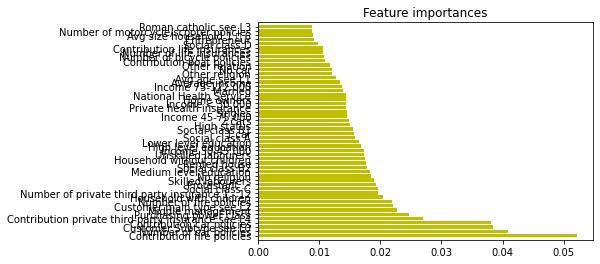

In [57]:
col_names_sorted, col_feature_scores = get_features_by_importance(clf, True)
show_feature_importance_stats(x_train, col_names_sorted, col_feature_scores, 50)

Importance figures tell you how much predictive power features possess in raw numbers - just multiple them by 100 to get percentage figures. When all summed up it amounts to one (1).

Now let's look at correlation between features to see if we can eliminate some.

In [58]:
def get_df_by_importance(classifer, df, show_all_features = True):

    feature_ranking_num = df.shape[1] if type(show_all_features) is bool else show_all_features
    
    col_names, _ =  get_features_by_importance(classifer, True)
    return df[col_names[:feature_ranking_num]]    

def show_correlation_among_features(classifier, df, show_all_features = True):
    corr = get_df_by_importance(classifier, df, show_all_features).corr()
    return corr.style.background_gradient(cmap='coolwarm')

In [59]:
show_correlation_among_features(clf, x_train, 15)

,Contribution fire policies,Number of car policies,Customer Subtype see L0,Contribution car policies,Contribution private third party insurance see L4,Purchasing power class,Middle management,Customer main type see L2,Number of fire policies,Household with children,Number of private third party insurance 1 - 12,Social class C,Protestant ...,Skilled labourers,No religion
Contribution fire policies,1.000000,0.108403,-0.020454,0.099442,0.480052,0.100955,-0.007888,-0.011458,0.862355,0.032491,0.482431,-0.044356,0.081060,-0.029778,-0.071861
Number of car policies,0.108403,1.000000,-0.022664,0.915113,0.158626,0.040910,0.020029,-0.016407,0.031002,0.029720,0.147227,0.013274,0.025496,-0.006374,-0.017268
Customer Subtype see L0,-0.020454,-0.022664,1.000000,-0.019431,-0.053513,-0.481747,-0.204890,0.887906,-0.026237,0.010179,-0.046482,0.315688,0.076131,0.257012,-0.024468
Contribution car policies,0.099442,0.915113,-0.019431,1.000000,0.168681,0.031408,0.016405,-0.016152,0.023711,0.036515,0.157769,0.023810,0.021960,0.003027,-0.016796
Contribution private third party insurance see L4,0.480052,0.158626,-0.053513,0.168681,1.000000,0.013213,0.016619,-0.053357,0.509897,-0.035928,0.981406,-0.022515,-0.002301,0.000492,-0.019243
Purchasing power class,0.100955,0.040910,-0.481747,0.031408,0.013213,1.000000,0.136889,-0.537730,0.027932,0.259571,0.004546,-0.329852,0.037614,-0.229049,-0.079053
Middle management,-0.007888,0.020029,-0.204890,0.016405,0.016619,0.136889,1.000000,-0.222455,-0.001691,-0.029874,0.014679,-0.140398,-0.025266,-0.349108,-0.030022
Customer main type see L2,-0.011458,-0.016407,0.887906,-0.016152,-0.053357,-0.537730,-0.222455,1.000000,-0.022518,0.059755,-0.044896,0.376345,0.083676,0.306276,0.001474
Number of fire policies,0.862355,0.031002,-0.026237,0.023711,0.509897,0.027932,-0.001691,-0.022518,1.000000,-0.014354,0.518138,-0.016456,0.055041,-0.014145,-0.052868
Household with children,0.032491,0.029720,0.010179,0.036515,-0.035928,0.259571,-0.029874,0.059755,-0.014354,1.000000,-0.034099,0.086215,0.024994,0.119026,0.027173


# Hyperparameter Tuning using Gridsearch with cv 

In [74]:
clf2 = RandomForestClassifier(random_state = 42)
print ("default Parameters in use:\n")
clf2.get_params()

default Parameters in use:



{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [62]:
from sklearn.model_selection import GridSearchCV

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 150, num = 20)]

max_features = ['auto', 'sqrt']

bootstrap = [True, False]

# Create the grid
grid = {'n_estimators': n_estimators, 'max_features': max_features,'bootstrap': bootstrap}

print(grid)

{'n_estimators': [10, 17, 24, 32, 39, 46, 54, 61, 68, 76, 83, 91, 98, 105, 113, 120, 127, 135, 142, 150], 'max_features': ['auto', 'sqrt'], 'bootstrap': [True, False]}


In [63]:
clf2 = RandomForestClassifier()

clf_grid = GridSearchCV(estimator = clf2, param_grid = grid, cv = 5, verbose=2, n_jobs = -1)
clf_grid.fit(data_features, data_target)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [10, 17, 24, 32, 39, 46, 54, 61, 68,
                                          76, 83, 91, 98, 105, 113, 120, 127,
                                          135, 142, 150]},
             verbose=2)

In [64]:
clf_grid.best_params_

{'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 83}

In [65]:
clf_final = RandomForestClassifier(n_estimators = 24, max_features = 'sqrt', random_state = 42)
clf_final.fit(data_features, data_target) 
build_confusion_matrix(clf_final, x_test, y_test)

Predicted Classes     0   1
Actual Classes             
0                  3743  19
1                   230   8

Correct: 3,751, Incorrect: 249, Total: 4,000 => Accuracy: 93.7750%


Increased  - by 0.25%!

Hum, you might have a hunch that one SINGLE tree can predict better after all? Be my guest!

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gb = GradientBoostingClassifier()
clf_gb.fit(data_features, data_target) 
build_confusion_matrix(clf_gb, x_test, y_test)

Predicted Classes     0   1
Actual Classes             
0                  3717  45
1                   226  12

Correct: 3,729, Incorrect: 271, Total: 4,000 => Accuracy: 93.2250%
